# Solar Flares Analysis

## 1. Introduction

### What is a solar flare ?

A Solar flare is the rapid release of a large amount of energy stored in the solar atmosphere. During a flare, gas is heated to 10 to 20 million degrees Kelvin (K) and radiates soft X rays and longer-wavelength emission. Unable to penetrate the Earth's atmosphere, the X rays can only be detected from space. Instruments on Skylab, SMM, the Japanese/US Yohkoh mission and other spacecraft have recorded many flares in X rays over the last twenty years or so. Ground-based observatories have recorded the visible and radio outputs. These data form the basis of our current understanding of a solar flare. But there are many possible mechanisms for heating the gas, and observations to date have not been able to differentiate between them.

HESSI's new approach

Researchers believe that much of the energy released during a flare is used to accelerate, to very high energies, electrons (emitting primarily X-rays) and protons and other ions (emitting primarily gamma rays). The new approach of the HESSI mission is to combine, for the first time, high-resolution imaging in hard X-rays and gamma rays with high-resolution spectroscopy, so that a detailed energy spectrum can be obtained at each point of the image.

This new approach will enable researchers to find out where these particles are accelerated and to what energies. Such information will advance understanding of the fundamental high-energy processes at the core of the solar flare problem.
https://hesperia.gsfc.nasa.gov/hessi/objectives.htm


### Context
Reuven Ramaty High Energy Solar Spectroscopic Imager (RHESSI, originally High Energy Solar Spectroscopic Imager or HESSI) is a NASA solar flare observatory. It is the sixth mission in the Small Explorer program, selected in October 1997 and launched on 5 February 2002. Its primary mission is to explore the physics of particle acceleration and energy release in solar flares.
HESSI was renamed to RHESSI on 29 March 2002 in honor of Reuven Ramaty, a pioneer in the area of high energy solar physics. RHESSI is the first space mission named after a NASA scientist. RHESSI was built by Spectrum Astro for Goddard Space Flight Center and is operated by the Space Sciences Laboratory in Berkeley, California. The principal investigator from 2002 to 2012 was Robert Lin, who was succeeded by Säm Krucker.

*useful links:*
https://en.wikipedia.org/wiki/Reuven_Ramaty_High_Energy_Solar_Spectroscopic_Imager
https://hesperia.gsfc.nasa.gov/hessi/objectives.htm

Content
Ramaty High Energy Solar Spectroscopic Imager (RHESSI)

Notes:
Note that only events with non-zero position and energy range not equal to 3-6 keV are confirmed as solar sources.
Events which have no position and show up mostly in the front detectors, but were not able to be imaged
are flagged as "PS".

Events which do not have valid position are only confirmed to be non-solar if the NS flag is set.
- `Peak Rate`: peak $counts/second$ in energy range $6-12 keV$, averaged over active collimators, including background.
- `Total Counts`: counts in energy range $6-12 keV$ integrated over duration of flare summed over all subcollimators, including background.
- `Energy`: the highest energy band in which the flare was observed. Electron $KeV$ (kilo electron volt) https://en.wikipedia.org/wiki/Electronvolt
- `Radial Distance`: distance from Sun center
- `Quality Codes`: $Q_n$, where $n$ is the total number of data gap, SAA, particle, eclipse or decimation flags set for event. in ranges from $0$ to $11$. Use care when analyzing the data when the quality is not zero.
- `Active_Region`: A number for the closest active region, if available
- `radial_offset`: the offset of the flare position from the spin axis of the spacecraft in $arcsec$. This is used in spectroscopy.
- `peak_c/s`: peak count rate in corrected counts.

Flare Flag Codes:
- `a0` - In attenuator state 0 (None) sometime during flare
- `a1` - In attenuator state 1 (Thin) sometime during flare
- `a2` - In attenuator state 2 (Thick) sometime during flare
- `a3` - In attenuator state 3 (Both) sometime during flare
- `An` - Attenuator state (0=None, 1=Thin, 2=Thick, 3=Both) at peak of flare
- `DF` - Front segment counts were decimated sometime during flare
- `DR` - Rear segment counts were decimated sometime during flare
- `ED` - Spacecraft eclipse (night) sometime during flare
- `EE` - Flare ended in spacecraft eclipse (night)
- `ES` - Flare started in spacecraft eclipse (night)
- `FE` - Flare ongoing at end of file
- `FR` - In Fast Rate Mode
- `FS` - Flare ongoing at start of file
- `GD` - Data gap during flare
- `GE` - Flare ended in data gap
- `GS` - Flare started in data gap
- `MR` - Spacecraft in high-latitude zone during flare
- `NS` - Non-solar event
- `PE` - Particle event: Particles are present
- `PS` - Possible Solar Flare; in front detectors, but no position
- `Pn` - Position Quality: $P_0$ = Position is NOT valid, $P_1$ = Position is valid
- `Qn` - Data Quality: $Q_0$ = Highest Quality, $Q_11$ = Lowest Quality
- `SD` - Spacecraft was in SAA sometime during flare
- `SE` - Flare ended when spacecraft was in SAA
- `SS` - Flare started when spacecraft was in SAA


In [1]:
!pip install pandas sklearn seaborn

## 2. Reworking the data 
### Loading the dataset

In [2]:
import pandas as pd

df = pd.read_csv('solar_flares_until_2018.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116143 entries, 0 to 116142
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flare             116143 non-null  int64  
 1   start.date        116143 non-null  object 
 2   start.time        116143 non-null  object 
 3   peak              116143 non-null  object 
 4   end               116143 non-null  object 
 5   duration.s        116143 non-null  int64  
 6   peak.c/s          116143 non-null  int64  
 7   total.counts      116143 non-null  float64
 8   energy.kev        116143 non-null  object 
 9   x.pos.asec        116143 non-null  int64  
 10  y.pos.asec        116143 non-null  int64  
 11  radial            116143 non-null  int64  
 12  active.region.ar  116143 non-null  int64  
 13  flag.1            116143 non-null  object 
 14  flag.2            116143 non-null  object 
 15  flag.3            96236 non-null   object 
 16  flag.4            95

#### We can see that there is $115k+$ items, it is also pretty clean, workable.

In [3]:
# Renaming column for easier processing
df = df.rename(columns={"start.date": "s_date", 
                        "start.time": "s_time",
                        "duration.s": "duration",
                        "peak.c/s": "peak_count",
                        "total.counts": "total",
                        "energy.kev": "energy",
                        "x.pos.asec": "x",
                        "y.pos.asec": "y",
                        "active.region.ar": "region",
                        "flag.1": "f1",
                        "flag.2": "f2",
                        "flag.3": "f3",
                        "flag.4": "f4",
                        "flag.5": "f5"})

# Formating s_date to Datetime object
df['s_date'] = pd.to_datetime(df['s_date'], format='%Y-%m-%d')
df.head()

,flare,s_date,s_time,peak,end,duration,peak_count,total,energy,x,y,radial,region,f1,f2,f3,f4,f5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [4]:
df['energy'].unique()

array(['12-25', '6-12', '25-50', '3-6', '50-100', '100-300', '300-800',
       '7000-20000', '800-7000'], dtype=object)

#### We can see that `energy` is a range, we can give it a corresponding level

In [5]:
df.loc[df['energy'] == "3-6", 'energy'] = 1
df.loc[df['energy'] == "6-12", 'energy'] = 2
df.loc[df['energy'] == "12-25", 'energy'] = 3
df.loc[df['energy'] == "25-50", 'energy'] = 4
df.loc[df['energy'] == "50-100", 'energy'] = 5
df.loc[df['energy'] == "100-300", 'energy'] = 6
df.loc[df['energy'] == "300-800", 'energy'] = 7
df.loc[df['energy'] == "800-7000", 'energy'] = 8
df.loc[df['energy'] == "7000-20000", 'energy'] = 9

df.head()

,flare,s_date,s_time,peak,end,duration,peak_count,total,energy,x,y,radial,region,f1,f2,f3,f4,f5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,3,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,2,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,2,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,3,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,4,-272,390,476,9825,A1,GS,P1,PE,Q2


`energy` is now a level :
- 1 : $]3-6]\ KeV$
- 2 : $]6-12]\ KeV$
- 3 : $]12-25]\ KeV$
- 4 : $]25-50]\ KeV$
- 5 : $]50-100]\ KeV$
- 6 : $]100-300]\ KeV$
- 7 : $]300-800]\ KeV$
- 8 : $]800-7000]\ KeV$
- 9 : $]7000-20000]\ KeV$
- 0 : everything else

#### Number of flare by energy level

<AxesSubplot:xlabel='energy', ylabel='Count'>

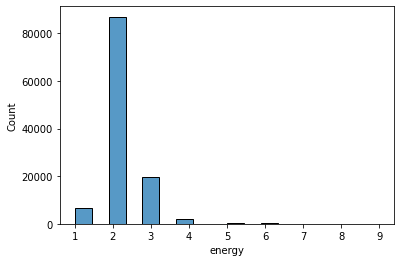

In [6]:
import seaborn as sns

sns.histplot(df['energy'])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

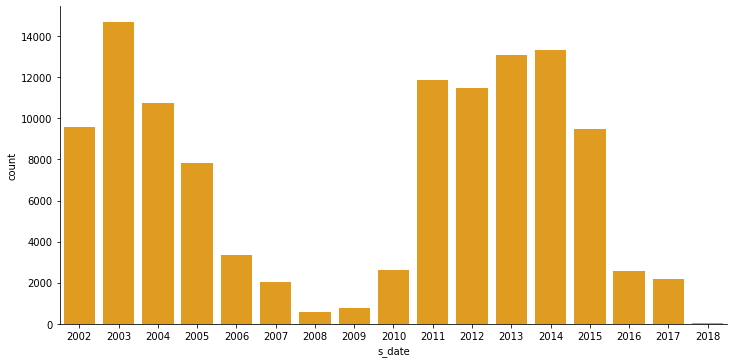

In [7]:
sns.catplot(data=df, x=df['s_date'].dt.year, aspect=2,
                       kind="count", color="orange")

#### Now we'll investigate the biggest flares

count    116143.000000
mean        687.896989
std         511.364382
min           0.000000
25%         467.000000
50%         759.000000
75%         946.000000
max       14154.000000
Name: radial, dtype: float64

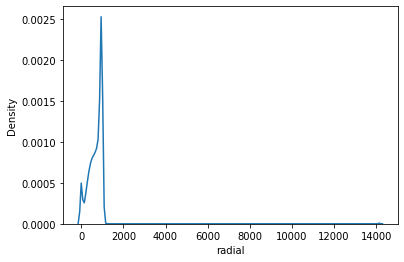

In [52]:
import numpy as np

sns.kdeplot(df["radial"])
df['radial'].describe()

#### The bump at $14k$ is weird

<AxesSubplot:xlabel='radial', ylabel='Count'>

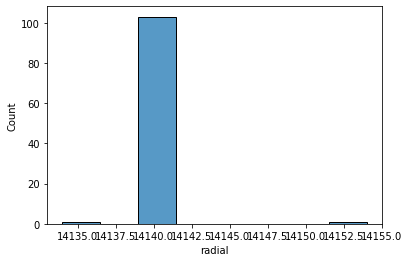

In [70]:
df.loc[df['radial'] > 13999].count()
df_bf = df.loc[df["radial"] > 14130] # Making a dataframe according
sns.histplot(df_bf['radial'])